/tmp/ipykernel_8045/4212151394.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


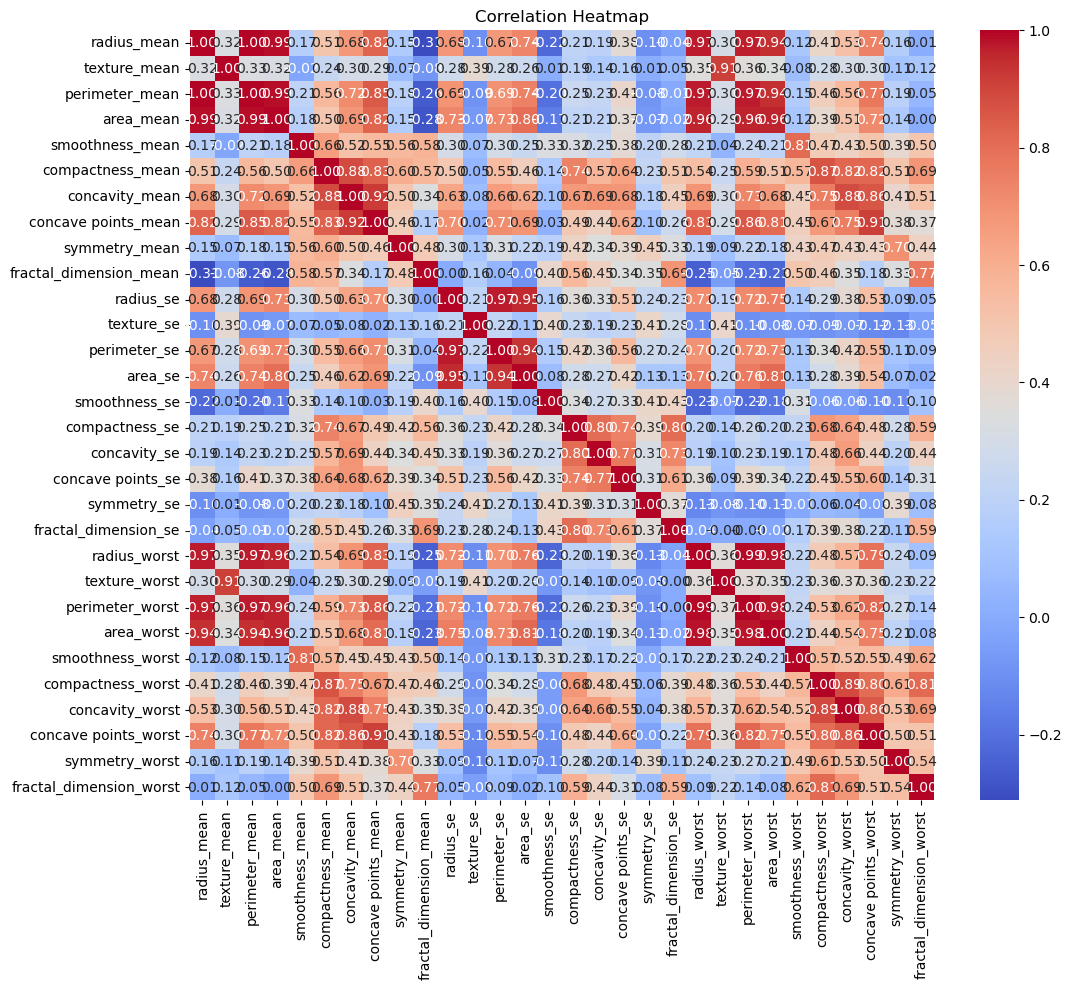

569
Length of data = 569
Weights and Biases for each layer:
Layer 1:
Weights:
[[-0.06348371  0.19464533  0.1177293  ... -0.06009767 -0.1961022
  -0.18734121]
 [-0.25674705  0.03284286 -0.05534507 ...  0.13873313  0.19883612
   0.09210298]
 [ 0.05085492 -0.17648721 -0.12708347 ... -0.14944686  0.05644345
  -0.1958387 ]
 ...
 [-0.0170181   0.16660365 -0.13644493 ...  0.02267522  0.25218797
  -0.20504279]
 [ 0.07392942  0.11387495  0.22392931 ... -0.1386674  -0.02517746
  -0.22340677]
 [-0.19832212  0.0524558  -0.182701   ... -0.10092132 -0.07085497
   0.17010006]]
Biases:
[ 0.17572398  0.15183281 -0.13871305  0.09720971  0.09150911  0.21283054
  0.25190408 -0.18575649  0.11171506 -0.16149821  0.10721515 -0.03555757
 -0.04700048 -0.03424548  0.09308406 -0.06922023  0.14809231 -0.05612941
 -0.10245081  0.15143847 -0.09014724  0.00410691  0.11088564 -0.05947202
 -0.11877357 -0.0403767   0.24907035  0.14008599  0.04159524  0.10685232
 -0.03634524 -0.04037392  0.14954261 -0.10731245 -0.150075

/home/administrator/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
url = "Breast_Cancer_Wisconsin_dataset.csv"  
data = pd.read_csv(url)

# Drop unwanted columns (like 'id' and 'Unnamed: 32')
data = data.drop(['id', 'Unnamed: 32'], axis=1)

# Display correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

print(f"Length of data = {len(data)}")

# Data preprocessing
# Assuming the target variable is 'diagnosis' (M = malignant, B = benign)
# operation should be performed along columns, axis=1
X = data.drop(['diagnosis'], axis=1)  # Features
y = data['diagnosis']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the neural network model
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, alpha=0.0001,
                      solver='adam', random_state=42)

#two hidden layers with 100 and 50 neurons, respectively.
#Adam stands for Adaptive Moment Estimation. 
# It's an optimization algorithm used to update network weights iteratively based on training data
# random generator - initialization of weight
# Training the model

model.fit(X_train, y_train)

# Function to print bias values for each layer
# the values fed into the bias neurons...randomly assigned, and later modified during training (learned values).
# weights are computed to bias just like other neurons
# typically outputs a constant value, which is commonly set to 1.

def print_weights_and_biases(model):
    # Retrieve the weights and biases from the trained model
    weights = model.coefs_
    biases = model.intercepts_

    print("Weights and Biases for each layer:")
    for i, (w, b) in enumerate(zip(weights, biases), start=1):
        print(f"Layer {i}:")
        print(f"Weights:\n{w}")
        print(f"Biases:\n{b}\n")

# Print bias values
print_weights_and_biases(model)
    
# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Predicting on new samples (one malignant and one benign)
# Assuming 'new_samples' contains the new data points for prediction
# Replace these samples with your actual samples for prediction
new_samples = [
    # Features of a malignant sample
    [17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4,
     0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119,
     0.2654, 0.4601, 0.1189],
    # Features of a benign sample
    [13.54, 14.36, 87.46, 566.3, 0.09779, 0.08129, 0.06664, 0.04781, 0.1885, 0.05766, 0.2699, 0.7886, 2.058, 23.56,
     0.008462, 0.0146, 0.02387, 0.01315, 0.0198, 0.0023, 15.11, 19.26, 99.7, 711.2, 0.144, 0.1773, 0.239, 0.1288,
     0.2977, 0.07259]
]

# Scaling the new samples
scaled_new_samples = scaler.transform(new_samples)

# Predicting on the new samples
new_predictions = model.predict(scaled_new_samples)

# Displaying the predictions for new samples
for i, prediction in enumerate(new_predictions):
    sample_type = 'Malignant' if prediction == 'M' else 'Benign'
    print(f"Sample {i + 1}: Predicted as {sample_type}")
